# CubeSat Orbit Simulation and Ground Track

This notebook explores and visualizes real a CubeSat orbit in low Earth orbit (LEO) using Two-Line Element (TLE) data from Skyfield and plots the ground track over time.
 
It is part of a larger project to understand how satellite missions align with core physics concepts — including Newton’s laws, gravitation, and orbital mechanics.

This is a beginner-friendly analysis designed to combine data science, astronomy, and physics in a meaningful way.

In [35]:
# Imports
from skyfield.api import load
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

## Load a Real CubeSat from Celestrak

We’ll retrieve a current CubeSat TLE from Celestrak's live database and use it for orbit simulation.

In [36]:
# Load Celestrak's live CubeSat TLEs
# Use "reload = True" to delete Skyfield's cached TLE files
url = 'https://celestrak.org/NORAD/elements/cubesat.txt'
cube_tles = load.tle_file(url, reload = True)
print(f"Loaded {len(cube_tles)} CubeSats")

[#################################] 100% cubesat.txt


Loaded 98 CubeSats


## Preview Available CubeSats

This section prints the names of the first several CubeSats loaded from Celestrak's live TLE feed. This gives us a sense of what is currently in orbit and available for simulation.

Use this list to identify a CubeSat you'd like to analyze. Names can vary in format and may include mission IDs, numbers, or acronyms.

Tip: Try adjusting the slice (`[:10]`, `[:30]`, etc.) to explore more of the dataset.

In [41]:
# Optional: Preview first 10 satellite names
for sat in cube_tles[:10]:
    print(sat.name)

CUTE-1 (CO-55)
CUBESAT XI-IV (CO-57)
CUBESAT XI-V
CUTE-1.7+APD II (CO-65)
CANX-2
SEEDS II (CO-66)
SWISSCUBE
BEESAT-1
ITUPSAT1
TISAT 1


## Search and Select a CubeSat by Name

Here we filter the list of CubeSats to find one whose name contains a given keyword. This allows us to focus on a specific mission, such as `"GRIFEX"`, `"FIREBIRD"`, `"DOVE"`, or `"SWISSCUBE"`.

The code checks for matches and assigns the first result to the `satellite` variable, which we will use for simulation.

To try a different CubeSat:
- Change the `target_name` string
- Make sure the name matches part of an entry from the list above
- The search is case-insensitive but must be an exact substring

In [38]:
# Select a CubeSat by name (change to any valid name from above)
target_name = "BRITE-AUSTRIA"
matches = [sat for sat in cube_tles if target_name in sat.name.upper()]

if matches:
    satellite = matches[0]
    print(f"Selected: {satellite.name}")
else:
    print(f"No CubeSat found with name containing: {target_name}")

ts = load.timescale()

Selected: BRITE-AUSTRIA


## Simulate Positions Over Time

In [39]:
times = ts.utc(2020, 1, 29, range(0, 90*24, 10))  # every 10 min for 90 days
geocentric = satellite.at(times)
subpoints = geocentric.subpoint()
latitudes = subpoints.latitude.degrees
longitudes = subpoints.longitude.degrees

## Plot Ground Track

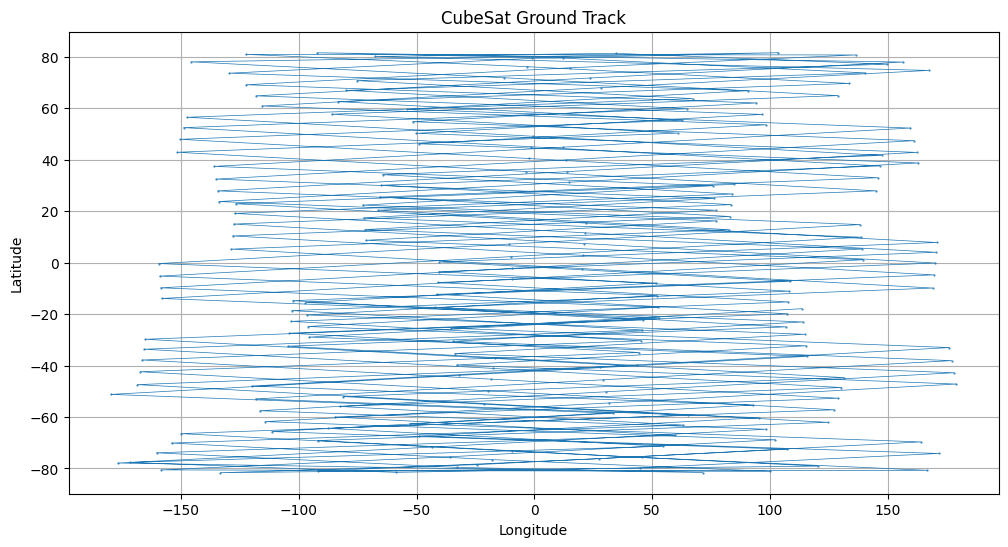

In [40]:
plt.figure(figsize=(12, 6))
plt.title("CubeSat Ground Track")
plt.plot(longitudes, latitudes, '.-', markersize=1, linewidth=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

## Next Steps (Planned Features)

- **Add Eccentricity Filtering**: Highlight elliptical vs circular orbits
- **Calculate Orbital Periods**: Use Kepler’s Third Law to estimate duration
- **Sort/Filter by Inclination**: Group orbits by range (equatorial, polar, retrograde)
- **Model Altitude Decay**: Estimate drag effects on LEO CubeSats
- **Mission Tagging**: Add science purpose metadata for each CubeSat
- **Coverage Estimation**: Simulate ground tracks and revisit frequency

Each feature connects orbital mechanics to mission design and deepens insight into CubeSat trajectories.
